In [20]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
dataset1 = pd.read_csv('pilpres_1.csv')
dataset2 = pd.read_csv('capres.csv')
dataset3 = pd.read_csv('calonpresiden_1.csv')

In [22]:
frames =[dataset1,dataset2,dataset3]
label = dataset1['tweet']
label = dataset2['tweet']
label = dataset3['tweet']

In [23]:
import nltk
nltk.download('punkt') # Sentence Tokenizer
nltk.download('stopwords') # Stopword

[nltk_data] Downloading package punkt to C:\Users\Windows
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Windows
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.corpus import stopwords
stop=nltk.corpus.stopwords.words('indonesian')
label = label.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [26]:
label = label.str.replace('[^\w\s]','') 

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_2428\2073532577.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  label = label.str.replace('[^\w\s]','')


In [27]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
word_string="".join(label.str.upper())
wordcloud = WordCloud(stopwords=STOPWORDS,
background_color='black',
).generate(word_string)

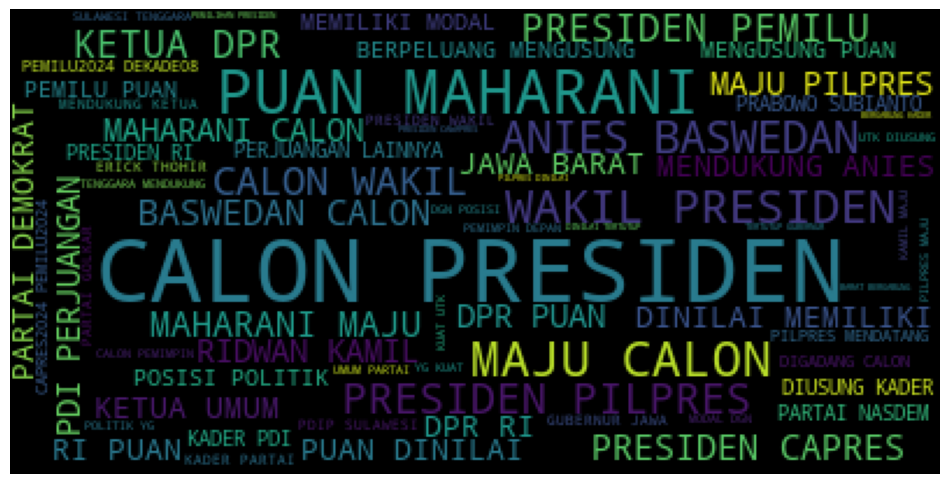

In [28]:
plt.figure(figsize=(12,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig("wordz.png")
plt.show()

In [29]:

#create function to get a DataFrame
def get_df(input_text):
    list_words = input_text.split(' ')
    set_words_full = list(set(list_words))
    
    #remove stop words
    set_words = [i for i in set_words_full if i not in stop_words]
    
    #count each word
    count_words = [list_words.count(i) for i in set_words]
    
    #create DataFrame
    df = pd.DataFrame(zip(set_words, count_words), columns=['words','count'])
    df.sort_values('count', ascending=False, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

#create function to get a color dictionary
def get_colordict(palette,number,start):
    pal = list(sns.color_palette(palette=palette, n_colors=number).as_hex())
    color_d = dict(enumerate(pal, start=start))
    return color_d

In [30]:
df_words = get_df(word_string) 
df_words.head(10)

,words,count
0,PRESIDEN,1254
1,CALON,1124
2,2024,1005
3,PUAN,540
4,MAHARANI,394
5,MAJU,380
6,PILPRES,350
7,ANIES,262
8,PARTAI,249
9,KETUA,235
